In [10]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img


In [11]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.activations import relu,sigmoid,softmax
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
from keras.applications import VGG16,MobileNet,InceptionResNetV2,ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications import  mobilenet,inception_resnet_v2,InceptionV3
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [18]:
from keras.applications.imagenet_utils import preprocess_input,decode_predictions

In [1]:
from load import *

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# defining directory
directory='/data/deeplearning/proj1_data/images/'

In [13]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 44s 0us/step


In [3]:
global model, graph
model, graph = init()

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [4]:
model_incepres=InceptionResNetV2()

In [5]:
model_incepres.load_weights('/data/deeplearning/proj1_data/images/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')

In [4]:
import keras

In [ ]:
keras.models.load_model()

In [6]:
model_incepres.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
from glob import glob

In [8]:
images=glob(directory+'*.jpg')

In [15]:
def classify_image(image,model,inceptionres_net):
    image=load_img(image,target_size=(224,224))
    image=img_to_array(image)
    image=image.reshape(1,224,224,3)
    image=inceptionres_net.preprocess_input(image)    
    pred=model.predict(image)
    label=inceptionres_net.decode_predictions(pred)
    return label

In [16]:
for image in images[:20]:
    out=classify_image(image,model_incepres,inception_resnet_v2)
    label=[i[1] for i in out[0]]
    prob=[i[2] for i in out[0]]
    print(dict(zip(label,prob)))

{'gas_pump': 0.9839807, 'washer': 0.008101193, 'vending_machine': 0.005350351, 'pay-phone': 0.002057559, 'cash_machine': 0.00017852506}
{'water_jug': 0.24376772, 'perfume': 0.18772994, 'water_bottle': 0.11956102, 'lampshade': 0.110437065, 'gasmask': 0.06782032}
{'totem_pole': 0.32700944, 'throne': 0.30985177, 'studio_couch': 0.23491177, 'rocking_chair': 0.10223685, 'four-poster': 0.0120022325}
{'gas_pump': 0.9839807, 'washer': 0.008101193, 'vending_machine': 0.005350351, 'pay-phone': 0.002057559, 'cash_machine': 0.00017852506}
{'racket': 0.9980106, 'tennis_ball': 0.0019890568, 'electric_fan': 8.253295e-08, 'ping-pong_ball': 2.0216003e-08, 'strainer': 1.0684096e-08}
{'banjo': 0.25445542, 'crutch': 0.2015803, 'acoustic_guitar': 0.10441884, 'drumstick': 0.06231026, 'jersey': 0.051128525}
{'pajama': 0.59665096, 'stethoscope': 0.37172073, 'jean': 0.007184647, 'lab_coat': 0.004485831, 'sweatshirt': 0.0034407116}
{'banjo': 0.25445542, 'crutch': 0.2015803, 'acoustic_guitar': 0.10441884, 'drums

In [5]:
def classify_image(image):
    image=load_img(image,target_size=(224,224))
    image=img_to_array(image)
    image=image.reshape(1,224,224,3)
    image=preprocess_input(image)    
    pred=model.predict(image)
    label=decode_predictions(pred)
    return label

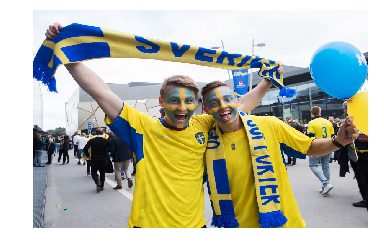

{'sarong': 0.126, 'parachute': 0.096, 'ski': 0.076, 'plunger': 0.072, 'mailbag': 0.045}


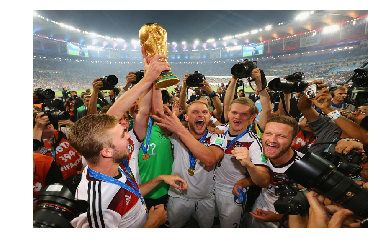

{'torch': 0.776, 'stage': 0.137, 'swimming_trunks': 0.022, 'maillot': 0.019, 'drum': 0.01}


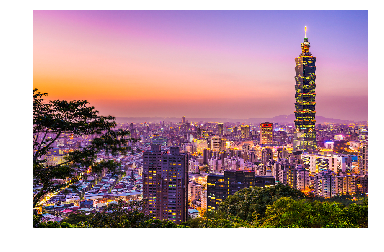

{'castle': 0.578, 'palace': 0.11, 'fountain': 0.081, 'church': 0.072, 'pole': 0.041}


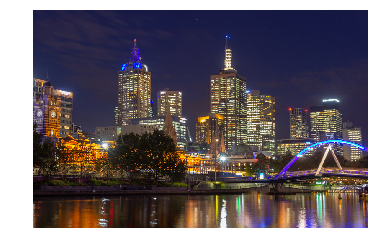

{'fountain': 0.517, 'drilling_platform': 0.109, 'church': 0.104, 'castle': 0.04, 'pier': 0.037}


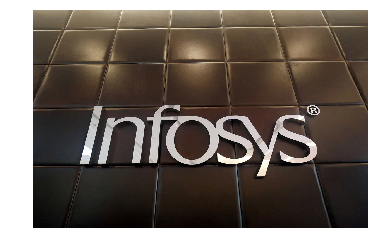

{'planetarium': 0.757, 'spotlight': 0.04, 'wallet': 0.029, 'knot': 0.021, 'chain': 0.017}


In [13]:
for image in images[445:450]:
    out=classify_image(image)
    img=plt.imread(image)
    plt.axis('off')
    plt.imshow(img,aspect='auto')
    plt.show()
    #print('label: {} , probability :{}'.format(out[1],round(float(out[2]),2)))
    label=[i[1] for i in out[0]]
    prob=[round(float(i[2]),3) for i in out[0]]
    print(dict(zip(label,prob)))

In [12]:
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline